# Bisnis Understanding

Fokus utama adalah memprediksi apakah suatu startup yang sedang beroperasi akan menjadi sukses atau mengalami kegagalan di masa depan. Melalui analisis yang kami lakukan, kami dapat mencari pola atau korelasi antara fitur-fitur tertentu (seperti total pendanaan, lokasi geografis, kategori bisnis) dengan status operasional perusahaan. Hal ini dapat memberikan wawasan tentang faktor-faktor yang berkorelasi dengan kesuksesan atau kegagalan startup.

## Pertanyaan Bisnis
1. Bagaimana korelasi antara  total pendanaan (funding_total_usd) dengan status suatu starup?
2.  kategori bisnis apa yang memiliki (category_list) dengan rata-rata total pendanaan starup paling tinggi?
3. Berapa persentase perusahaan startup yang beroprasi dan yang gagal(closed) ?
4. Apakah ada perbedaan signifikan dalam jumlah pendanaan terkait dengan lokasi startup?
5. Bagaimana faktor waktu (founded_at, first_funding_at, last_funding_at) memengaruhi kesuksesan sebuah startup?
6. Apakah ada perbedaan dalam kesuksesan startup berdasarkan city?

# Data Understanding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/BCC Intern/dataset intern/big_startup_secsees_dataset.csv')
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [ ]:
data.nunique()

permalink            66368
name                 66102
homepage_url         61191
category_list        27296
funding_total_usd    18896
status                   4
country_code           137
state_code             311
region                1092
city                  5111
funding_rounds          19
founded_at            3978
first_funding_at      4817
last_funding_at       4518
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

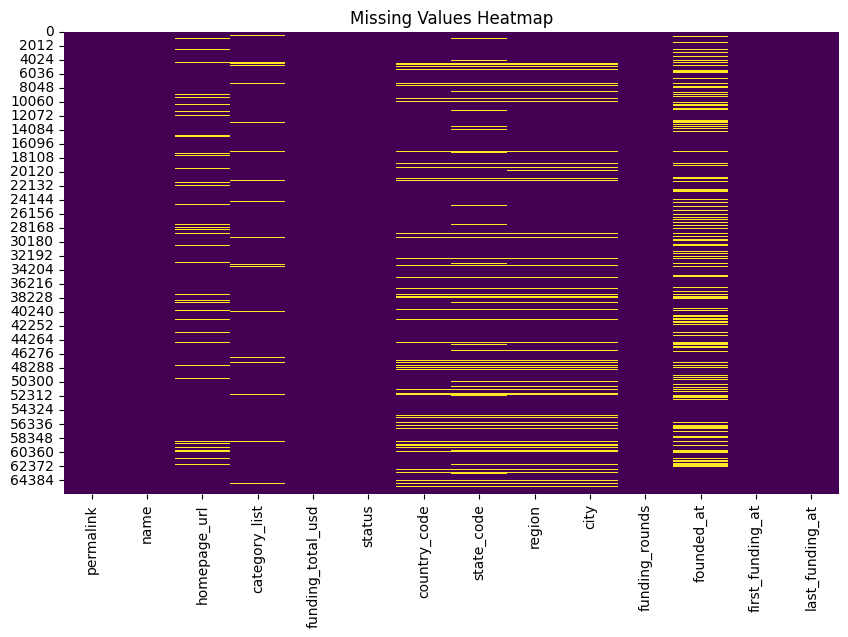

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

plt.title('Missing Values Heatmap')
plt.show()

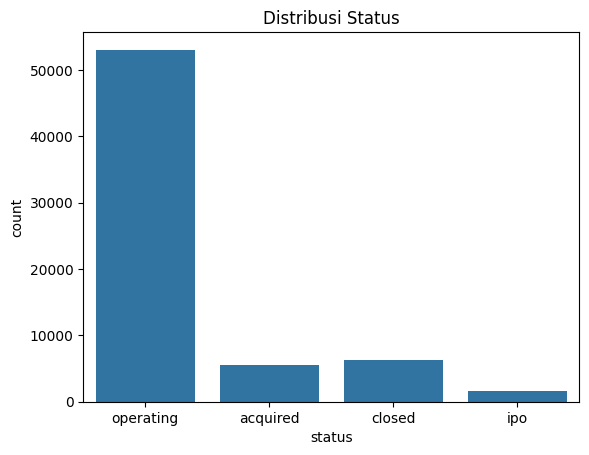

In [ ]:
sns.countplot(x='status', data=data)
plt.title('Distribusi Status')
plt.show()

# Explorasi Data Analys (EDA)

## Hubungan total_fund dengan starup

In [ ]:
data_totfund_status = data[['funding_total_usd','status']]
data_totfund_status

,funding_total_usd,status
0,10000000,operating
1,700000,operating
2,3406878,operating
3,2000000,operating
4,-,operating
...,...,...
66363,1587301,operating
66364,114304,operating
66365,-,operating
66366,18192,operating


In [ ]:
data_totfund_status['funding_total_usd'] = pd.to_numeric(data_totfund_status['funding_total_usd'], errors='coerce')
non_numeric_values = data_totfund_status[data_totfund_status['funding_total_usd'].isnull()]['funding_total_usd']
non_numeric_values

<ipython-input-19-e50c885e25ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totfund_status['funding_total_usd'] = pd.to_numeric(data_totfund_status['funding_total_usd'], errors='coerce')


4       NaN
10      NaN
11      NaN
12      NaN
22      NaN
         ..
66345   NaN
66346   NaN
66347   NaN
66351   NaN
66365   NaN
Name: funding_total_usd, Length: 12785, dtype: float64

In [ ]:
grouped_by_status = data_totfund_status.groupby('status')['funding_total_usd']
grouped_by_status.describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,4790.0,2.829304e+07,1.280034e+08,1500.0,2990956.75,10000000.0,26785659.5,5.820000e+09
closed,4912.0,1.089794e+07,4.380889e+07,2.0,200000.00,1250000.0,7000000.0,1.567504e+09
ipo,1441.0,1.457052e+08,9.882934e+08,4000.0,9400000.00,30675796.0,94100000.0,3.007950e+10
operating,42440.0,1.392845e+07,9.396951e+07,1.0,270803.50,1520832.0,7771325.0,1.066494e+10


In [ ]:
grouped_by_status = data_totfund_status.groupby('status')['funding_total_usd']
grouped_by_status.describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,4790.0,2.829304e+07,1.280034e+08,1500.0,2990956.75,10000000.0,26785659.5,5.820000e+09
closed,4912.0,1.089794e+07,4.380889e+07,2.0,200000.00,1250000.0,7000000.0,1.567504e+09
ipo,1441.0,1.457052e+08,9.882934e+08,4000.0,9400000.00,30675796.0,94100000.0,3.007950e+10
operating,42440.0,1.392845e+07,9.396951e+07,1.0,270803.50,1520832.0,7771325.0,1.066494e+10


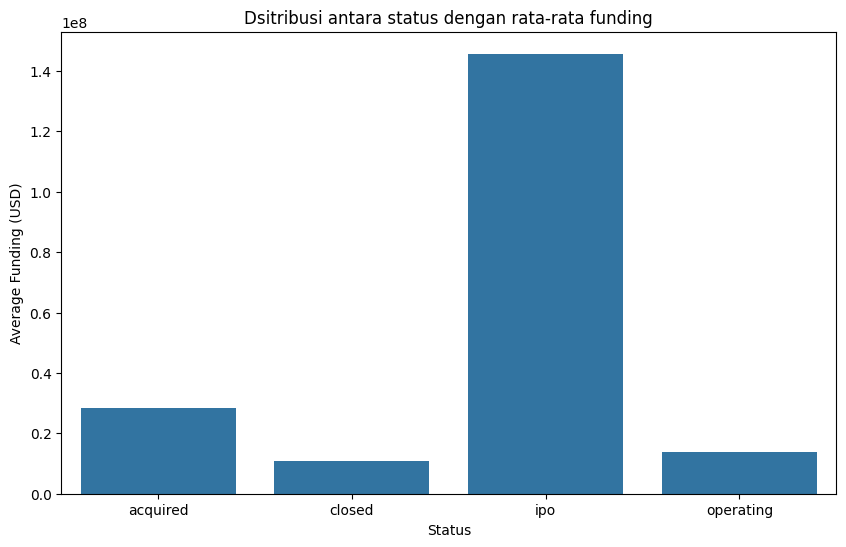

In [ ]:
average_funding_by_status = data_totfund_status.groupby('status')['funding_total_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='funding_total_usd', data=average_funding_by_status)
plt.xlabel('Status')
plt.ylabel('Average Funding (USD)')
plt.title('Relasii antara status dengan rata-rata funding')
plt.show()

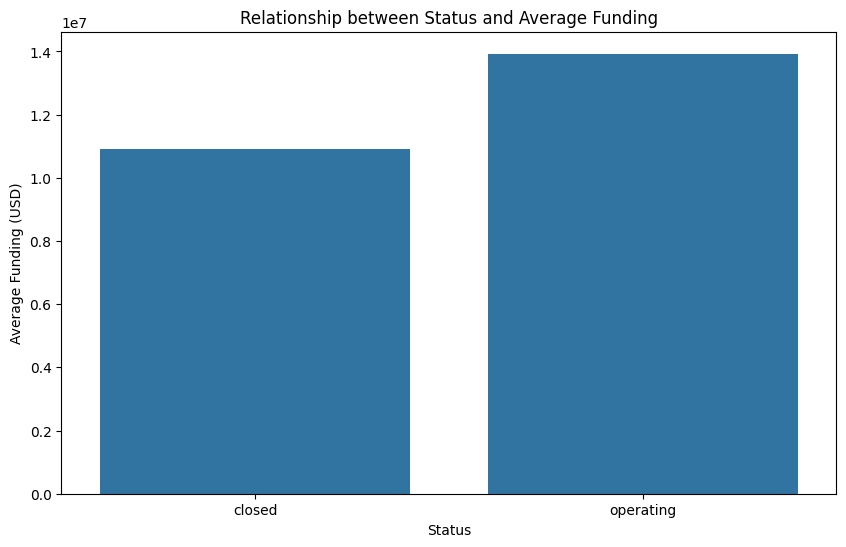

In [ ]:
filtered_data = data_totfund_status[data_totfund_status['status'].isin(['operating', 'closed'])]

average_funding_by_status = filtered_data.groupby('status')['funding_total_usd'].mean().reset_index()

# Buat plot bar
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='funding_total_usd', data=average_funding_by_status)
plt.xlabel('Status')
plt.ylabel('Average Funding (USD)')
plt.title('Relationship between Status and Average Funding')
plt.show()

## kategori starup (category_list) apa yang memiliki dengan rata-rata total pendanaan starup paling tinggi?

In [ ]:
data['category_list'].nunique()

27296

In [ ]:
data_kategori_totalfund =data[['category_list','funding_total_usd','status']]
data_kategori_totalfund

,category_list,funding_total_usd,status
0,Media,10000000,operating
1,Application Platforms|Real Time|Social Network...,700000,operating
2,Apps|Games|Mobile,3406878,operating
3,Curated Web,2000000,operating
4,Software,-,operating
...,...,...,...
66363,Enterprise Software,1587301,operating
66364,Advertising|Mobile|Web Development|Wireless,114304,operating
66365,NaN,-,operating
66366,Consumer Electronics|Internet of Things|Teleco...,18192,operating


In [ ]:
data_kategori_totalfund['funding_total_usd'] = pd.to_numeric(data_kategori_totalfund['funding_total_usd'], errors='coerce')
grouped_data = data_kategori_totalfund.groupby('category_list').agg({'funding_total_usd': 'mean', 'status': 'unique'}).reset_index()


<ipython-input-63-082692900ef1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kategori_totalfund['funding_total_usd'] = pd.to_numeric(data_kategori_totalfund['funding_total_usd'], errors='coerce')


In [ ]:
highest_avg_funding_category = grouped_data.sort_values(by='funding_total_usd', ascending=False)
highest_avg_funding_category.head(20)

,category_list,funding_total_usd,status
12123,Communications Infrastructure|Information Tech...,1.504089e+10,"[operating, ipo]"
12810,Consulting|Product Development Services|Produc...,1.066494e+10,[operating]
24124,Internet|Telecommunications|Television|Video,5.162513e+09,[ipo]
5796,Architecture|Banking|Finance,5.150000e+09,[ipo]
7237,Banking|Financial Services|Insurance|Investmen...,4.745460e+09,[operating]
1209,Advertising|Broadcasting|Content,4.715000e+09,[acquired]
17030,Distributors|E-Commerce|Manufacturing,4.630000e+09,[ipo]
6604,Automotive|Design|Limousines|Public Transporta...,4.109165e+09,[operating]
26108,Payments|Trading,3.500000e+09,[ipo]
2288,Agriculture|Animal Feed|Biotechnology,3.200000e+09,[operating]


<ipython-input-73-5c765c5ebfb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='funding_total_usd', y='category_list', data=top_10_categories, palette='viridis')


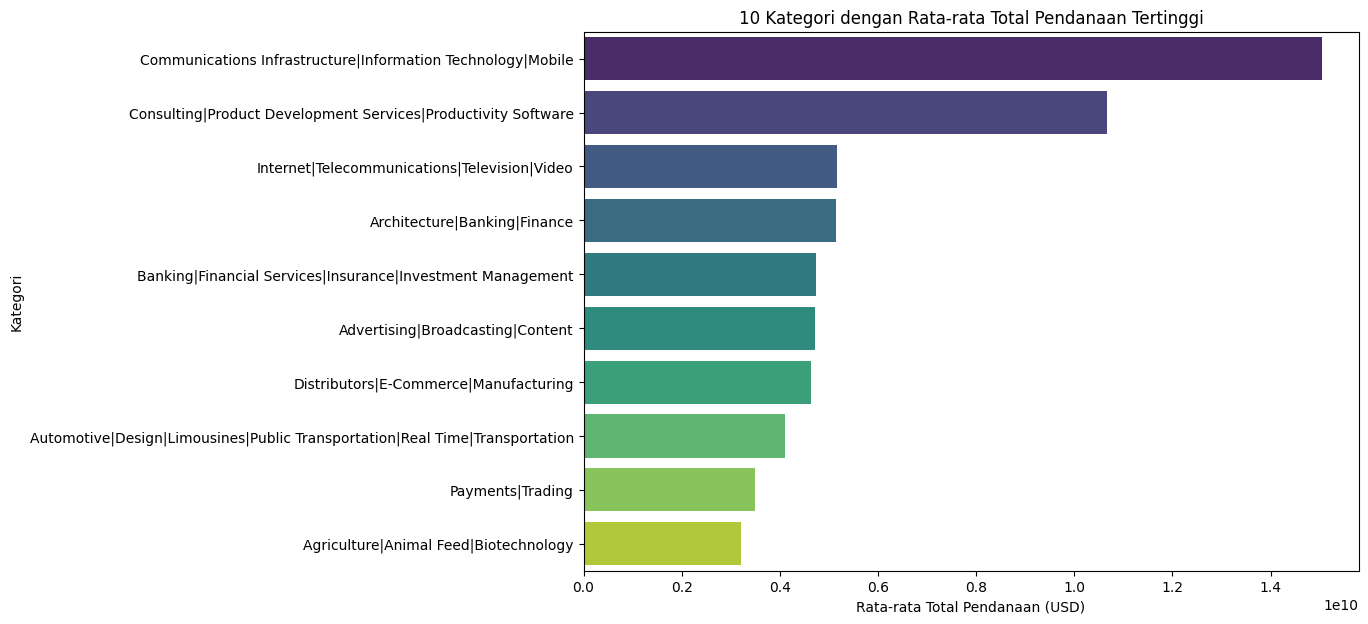

In [ ]:
top_10_categories=highest_avg_funding_category.head(10)
plt.figure(figsize=(10, 7))
sns.barplot(x='funding_total_usd', y='category_list', data=top_10_categories, palette='viridis')
plt.xlabel('Rata-rata Total Pendanaan (USD)')
plt.ylabel('Kategori')
plt.title('10 Kategori dengan Rata-rata Total Pendanaan Tertinggi')
plt.show()

## Presentase startup yang gagal dengan starup yang ipo

In [ ]:
data_status = data['status']

In [ ]:
data_status.unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [ ]:
status_counts = data['status'].value_counts()

status_percentage = (status_counts / len(data)) * 100


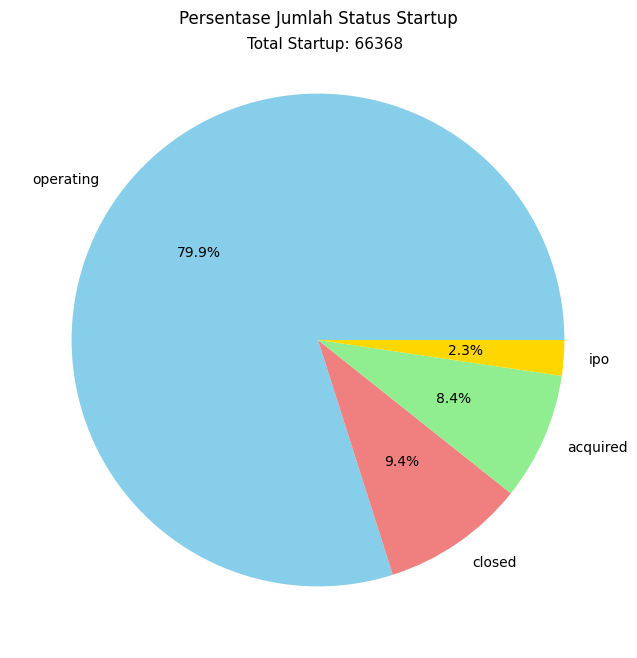

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(status_percentage, labels=status_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Persentase Jumlah Status Startup')
plt.text(0.03, 1.2, f"Total Startup: {len(data)}", color='black', ha='center', va='center', fontsize=11)
plt.show()

In [1]:
! git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           [--super-prefix=<path>] [--config-env=<name>=<envvar>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone     Clone a repository into a new directory
   init      Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add       Add file contents to the index
   mv        Move or rename a file, a directory, or a symlink
   restore   Restore working tree files
   rm        Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect    Use binary search to find th

In [2]:
! git clone https://github.com/frhannn1/BCC-Intern.git

Cloning into 'BCC-Intern'...


In [3]:
! pwd

/content


In [4]:
%cd BCC-Intern

/content/BCC-Intern


In [5]:
! git remote -v

origin	https://github.com/frhannn1/BCC-Intern.git (fetch)
origin	https://github.com/frhannn1/BCC-Intern.git (push)


In [6]:
! git status

On branch main

No commits yet

nothing to commit (create/copy files and use "git add" to track)
